## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,\
                                RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, silhouette_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## Table of Contents
- [Summary](#Summary)
- [Preliminary Data Cleaning](#Preliminary-Data-Cleaning)
- [EDA Highlights](#EDA-Highlights)
- [Modeling](#Modeling)

## Summary
This notebook contains a summary of code used in this project. Debugging and "sanity checks" have been omitted for tidiness. For a deeper dive into our analysis, please refer to the notebooks in ('./code_notebooks/').

## Functions

In [3]:
def clean_header(df):
    '''fn should format all dataframes as described below'''
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace("-", "_").str.replace(" ", "").str.replace("__", "_")

    return df

In [4]:
lr_m = pd.DataFrame(columns = ['Model', 'Train Score', 'Val Score', 'X Val Score', 'RMSE Train', 'RMSE Val'])

def update_lrm(model, model_name, X_train, X_test, y_train, y_test):
    '''fn updates a dataframe for quick reference of R squared scores and RMSE 
    to be used for MALE reg models'''
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        train_score = model.score(X_train, y_train)
        val_score = model.score(X_test, y_test)
        x_val_score = cross_val_score(model, X_train, y_train).mean()
        rmse1 = mean_squared_error(y_train, lr.predict(X_train))**0.5
        rmse2 = mean_squared_error(y_test, lr.predict(X_test))**0.5
        
        lr_m.loc[len(lr_m.index)] = [model_name, train_score, val_score, x_val_score, rmse1, rmse2] 
        
    return lr_m

In [5]:
lr_f = pd.DataFrame(columns = ['Model', 'Train Score', 'Val Score', 'X Val Score', 'RMSE Train', 'RMSE Val'])

def update_lrf(model, model_name, X_train, X_test, y_train, y_test):
    '''fn updates a dataframe for quick reference of R squared scores and RMSE
    to be used for FEMALE reg models'''
    import warnings
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        
        train_score = model.score(X_train, y_train)
        val_score = model.score(X_test, y_test)
        x_val_score = cross_val_score(model, X_train, y_train).mean()
        rmse1 = mean_squared_error(y_train, lr.predict(X_train))**0.5
        rmse2 = mean_squared_error(y_test, lr.predict(X_test))**0.5
        
        lr_f.loc[len(lr_f.index)] = [model_name, train_score, val_score, x_val_score, rmse1, rmse2] 
        
    return lr_f

In [6]:
# created a function to easily lookup targets by gender
def feature_lookup(x, gender):
    '''fn takes specific mortality feature "x" and gender to lookup 
    feauture importance with the associated mortality '''
    gender = gender.lower()
    
    if gender == 'male' or gender =='m':
        return feature_importance_male[[x, 'description']][feature_importance_male[x]>0]\
                .sort_values(by=x,ascending=False).head()
    elif gender == 'female' or gender == 'f':
        return feature_importance_female[[x, 'description']]\
                [np.abs(feature_importance_female[x])>0]\
                .sort_values(by=x,ascending=False).head()
    else:
        return print(f"Please enter a valid input")


## Preliminary Data Cleaning

The data used in the EDA consists of a collection of CSV files which contain many formatting issues. Before any EDA can occur, we apply some preliminary transformations.

In [7]:
ch83dg = pd.read_csv('./data/original_data/ch83dg.csv')
ch83m = pd.read_csv('./data/original_data/ch83m.csv')
ch83pru = pd.read_csv('./data/original_data/ch83pru.csv')
ch83q = pd.read_csv('./data/original_data/ch83q.csv')
ch89dg = pd.read_csv('./data/original_data/CH89DG.csv')
ch89m = pd.read_csv('./data/original_data/ch89m.csv')
ch89pru = pd.read_csv('./data/original_data/ch89pru.csv')
ch89q = pd.read_csv('./data/original_data/ch89q.csv')
ch93pru = pd.read_csv('./data/original_data/ch93pru.csv')
ch93q = pd.read_csv('./data/original_data/ch93q.csv')
chtaim = pd.read_csv('./data/original_data/chtaim.csv')
chtaipru = pd.read_csv('./data/original_data/chtaipru.csv')
chtaiq = pd.read_csv('./data/original_data/chtaiq.csv')

FileNotFoundError: [Errno 2] No such file or directory: './data/ch83dg.csv'

In [ ]:
# a list of every dataframe to iterate transformations over
df_list = [ch83dg, ch83m, ch83pru,\
           ch83q, ch89dg, ch89m,\
           ch89pru, ch89q, ch93pru,\
           ch93q, chtaim, chtaipru, chtaiq]

The CSV files contain varying lengths of whitespace and use a single period to denote NaN/Null values. We reformat the CSV's using the following list notation and regex

In [ ]:
# regex looking for whitespace and removing it
[i.replace(to_replace=' ', value='', regex=True, inplace=True) for i in df_list]
# regex looking for any period that is at alone at the end of a string
[i.replace(to_replace='^\.$', value='', regex=True, inplace=True) for i in df_list];

All cells in the dataframes were read in as strings automatically. We cast any values that can be read as numeric to numeric.

Pandas did not work too kindly with list notation so we had to redeclare the dataframes as shown below.

In [ ]:
ch83dg = ch83dg.apply(pd.to_numeric, errors='ignore')
ch83m = ch83m.apply(pd.to_numeric, errors='ignore')
ch83pru = ch83pru.apply(pd.to_numeric, errors='ignore')
ch83q = ch83q.apply(pd.to_numeric, errors='ignore')
ch89dg = ch89dg.apply(pd.to_numeric, errors='ignore')
ch89m = ch89m.apply(pd.to_numeric, errors='ignore')
ch89pru = ch89pru.apply(pd.to_numeric, errors='ignore')
ch89q = ch89q.apply(pd.to_numeric, errors='ignore')
ch93pru = ch93pru.apply(pd.to_numeric, errors='ignore')
ch93q = ch93q.apply(pd.to_numeric, errors='ignore')
chtaim = chtaim.apply(pd.to_numeric, errors='ignore')
chtaipru = chtaipru.apply(pd.to_numeric, errors='ignore')
chtaiq = chtaiq.apply(pd.to_numeric, errors='ignore')

An empty column appears at the end of each dataframe so we dropped it

In [ ]:
ch83dg.drop(columns='',inplace=True)
ch83m.drop(columns='',inplace=True)
ch83pru.drop(columns='',inplace=True)
ch83q.drop(columns='',inplace=True)
ch89dg.drop(columns='',inplace=True)
ch89m.drop(columns='',inplace=True)
ch89pru.drop(columns='',inplace=True)
ch89q.drop(columns='',inplace=True)
ch93pru.drop(columns='',inplace=True)
ch93q.drop(columns='',inplace=True)
chtaim.drop(columns='',inplace=True)
chtaipru.drop(columns='',inplace=True)
chtaiq.drop(columns='',inplace=True)

There is a large number of rows that do not contain any data. For these dataframes, we have chosen to filter out any row that contains more than 5 NaN values.

In [ ]:
ch83dg.dropna(thresh=5, inplace=True)
ch83m.dropna(thresh=5, inplace=True)
ch83pru.dropna(thresh=5, inplace=True)
ch89dg.dropna(thresh=5, inplace=True)
ch89m.dropna(thresh=5, inplace=True)
ch89pru.dropna(thresh=5, inplace=True)
ch93pru.dropna(thresh=5, inplace=True)
chtaim.dropna(thresh=5, inplace=True)
chtaipru.dropna(thresh=5, inplace=True)

With that, the preliminary cleaning is completed and we're able to read in our datasets for EDA. Files are exported to CSV file types.

In [ ]:
# This block of code is muted as to not repeatedly overwrite our existing files.

# ch83dg.to_csv(f"./cleaned_data/ch83dg.csv")
# ch83m.to_csv(f"./cleaned_data/ch83m.csv")
# ch83pru.to_csv(f"./cleaned_data/ch83pru.csv")
# ch83q.to_csv(f"./cleaned_data/ch83q.csv")
# ch89dg.to_csv(f"./cleaned_data/ch89dg.csv")
# ch89m.to_csv(f"./cleaned_data/ch89m.csv")
# ch89pru.to_csv(f"./cleaned_data/ch89pru.csv")
# ch89q.to_csv(f"./cleaned_data/ch89q.csv")
# ch93pru.to_csv(f"./cleaned_data/ch93pru.csv")
# ch93q.to_csv(f"./cleaned_data/ch93q.csv")
# chtaim.to_csv(f"./cleaned_data/chtaim.csv")
# chtaipru.to_csv(f"./cleaned_data/chtaipru.csv")
# chtaiq.to_csv(f"./cleaned_data/chtaiq.csv")

## EDA Highlights

For more detailed EDA please refer to our notebooks in the code_notebooks folder.

After cleaning the data, we quickly discovered the data from the CH83, CH93, and CHTAI CSV files were incomplete. That is to say the data within these CSV files did not contain all the data as described in the initial study. Given how large the volume of data we have, we decided to focus our endeavors on CH89 CSV files instead as they were the most complete with the full gambit of data as described in the initial study. The CH89 data has a questionnaire, blood/urine samples, a dietary survey and mortality rates from the years 1986-1988. 

In [4]:
ch89dg = pd.read_csv('./data/cleaned_data/CH89DG.csv', index_col = [0])
ch89m = pd.read_csv('./data/cleaned_data/ch89m.csv', index_col = [0])
ch89pru = pd.read_csv('./data/cleaned_data/ch89pru.csv', index_col = [0])
ch89q = pd.read_csv('./data/cleaned_data/ch89q.csv', index_col = [0])

There is a huge volume of data, thus it was easier to glean insights via barcharts. 

Below are some descriptive observations of the population.

In [10]:
# There is a county code "NA" that was read in as a NaN/Null
ch89q['county'].fillna('NA', inplace=True)

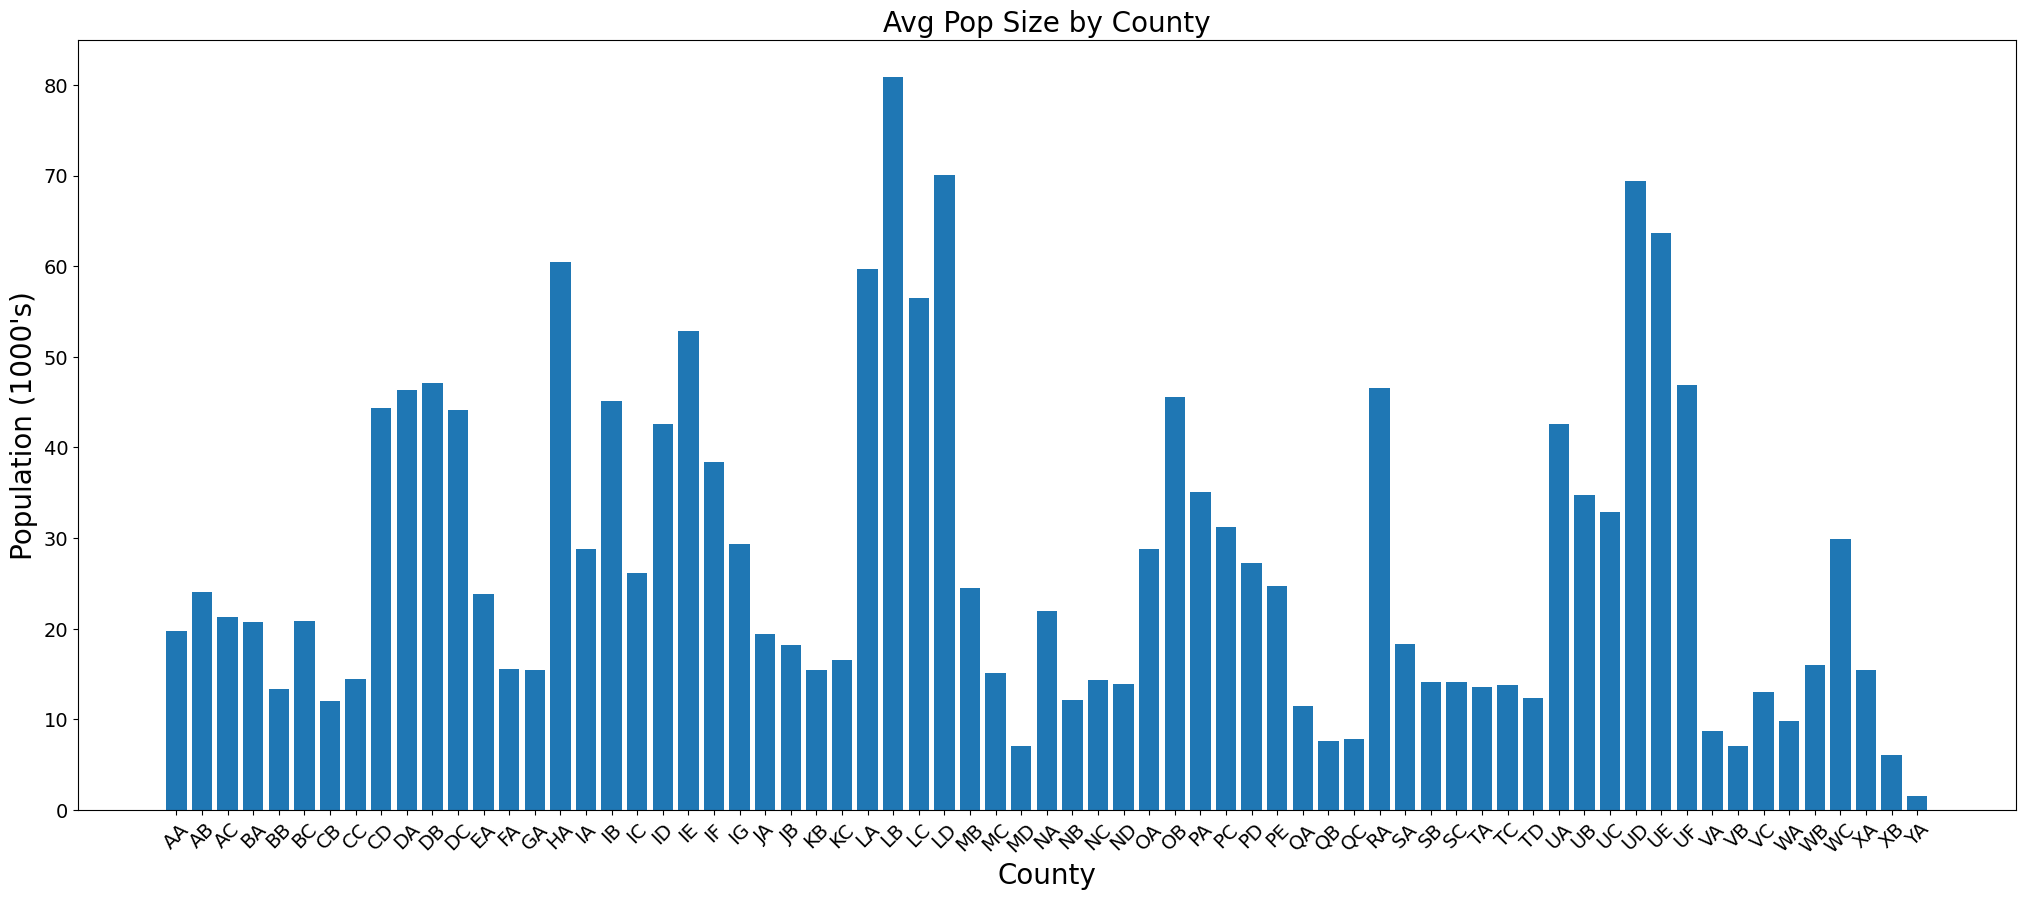

In [11]:
plt.figure(figsize=(25,10))
plt.bar(x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
    height = ch89q['q001'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel("County", fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel("Population (1000's)", fontsize=20)
plt.title('Avg Pop Size by County', fontsize=20)
plt.show;

What is the scale and magnitude of our population? Does the data population size affect mortality rates in any capacity?

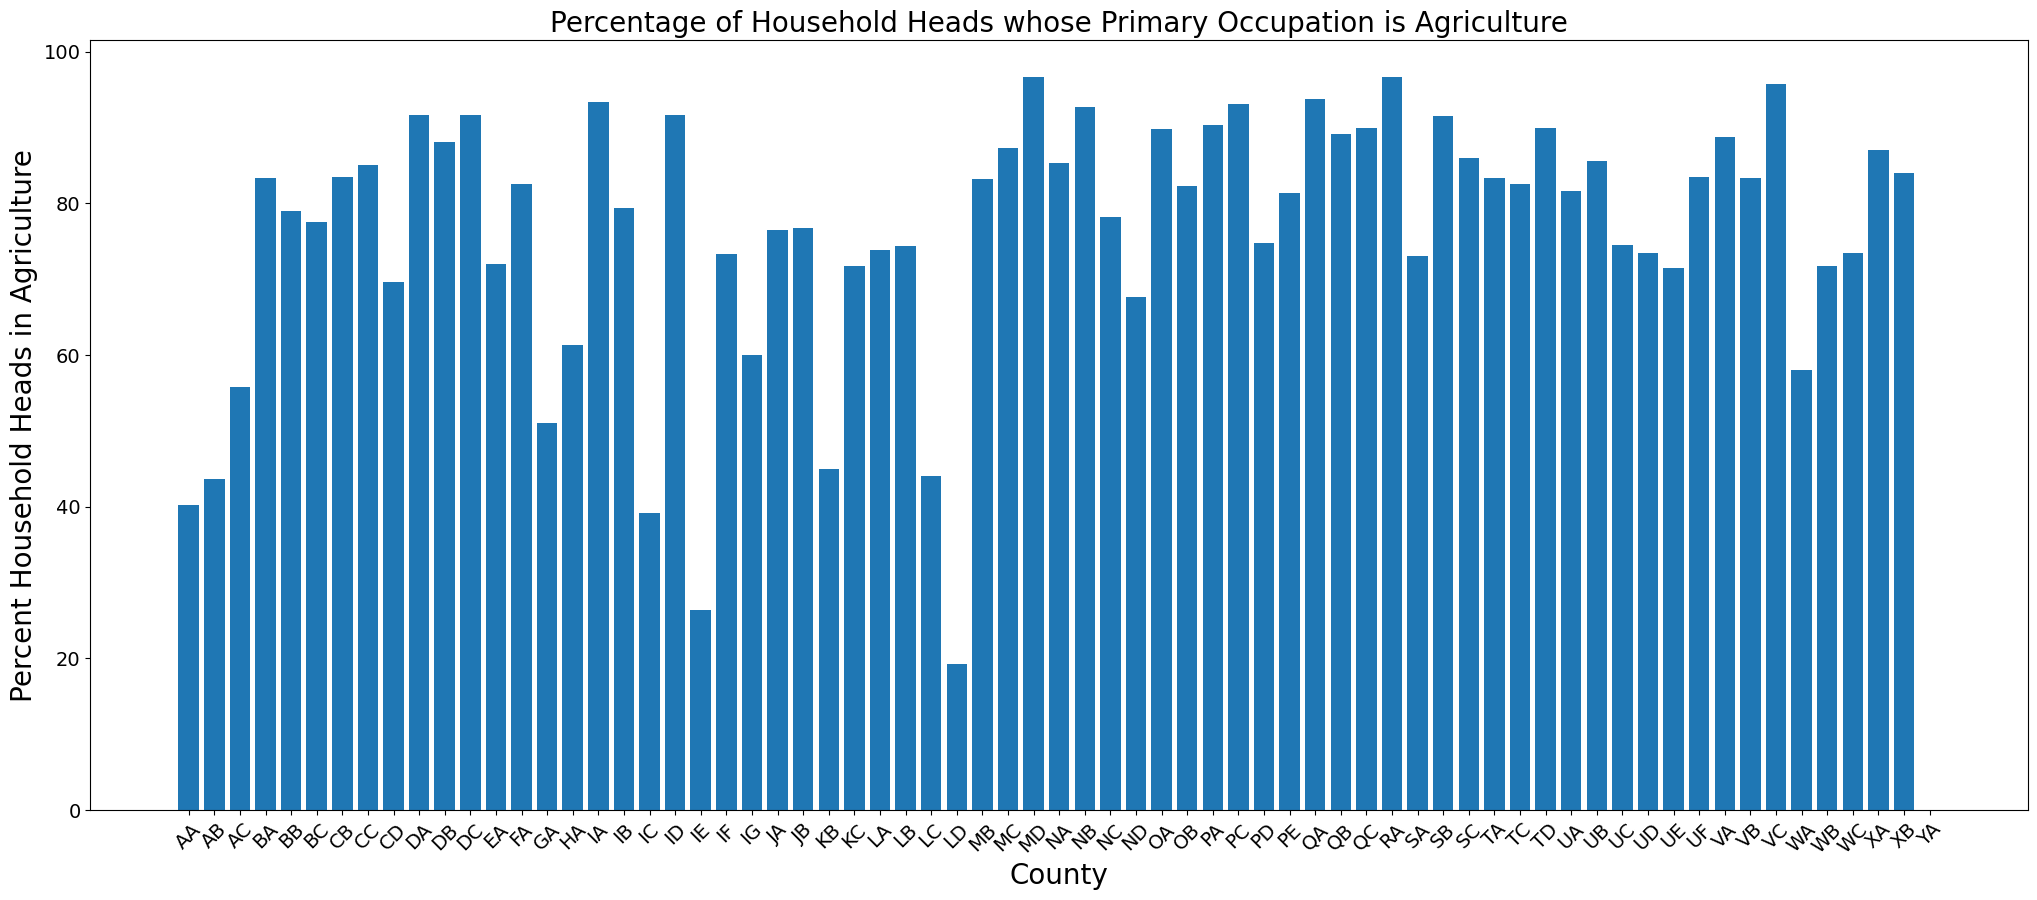

In [12]:
plt.figure(figsize=(25,10))
plt.bar(x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
        height = ch89q['q010'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
plt.xticks(rotation=45, fontsize=14)
plt.xlabel("County", fontsize=20)
plt.yticks(fontsize=14)
plt.ylabel("Percent Household Heads in Agriculture", fontsize=20)
plt.title('Percentage of Household Heads whose Primary Occupation is Agriculture', fontsize=20)
plt.show;

What are the communities like in this study? What percentage or households farm? Will the ratio of agricultural focus give insight to our findings later?

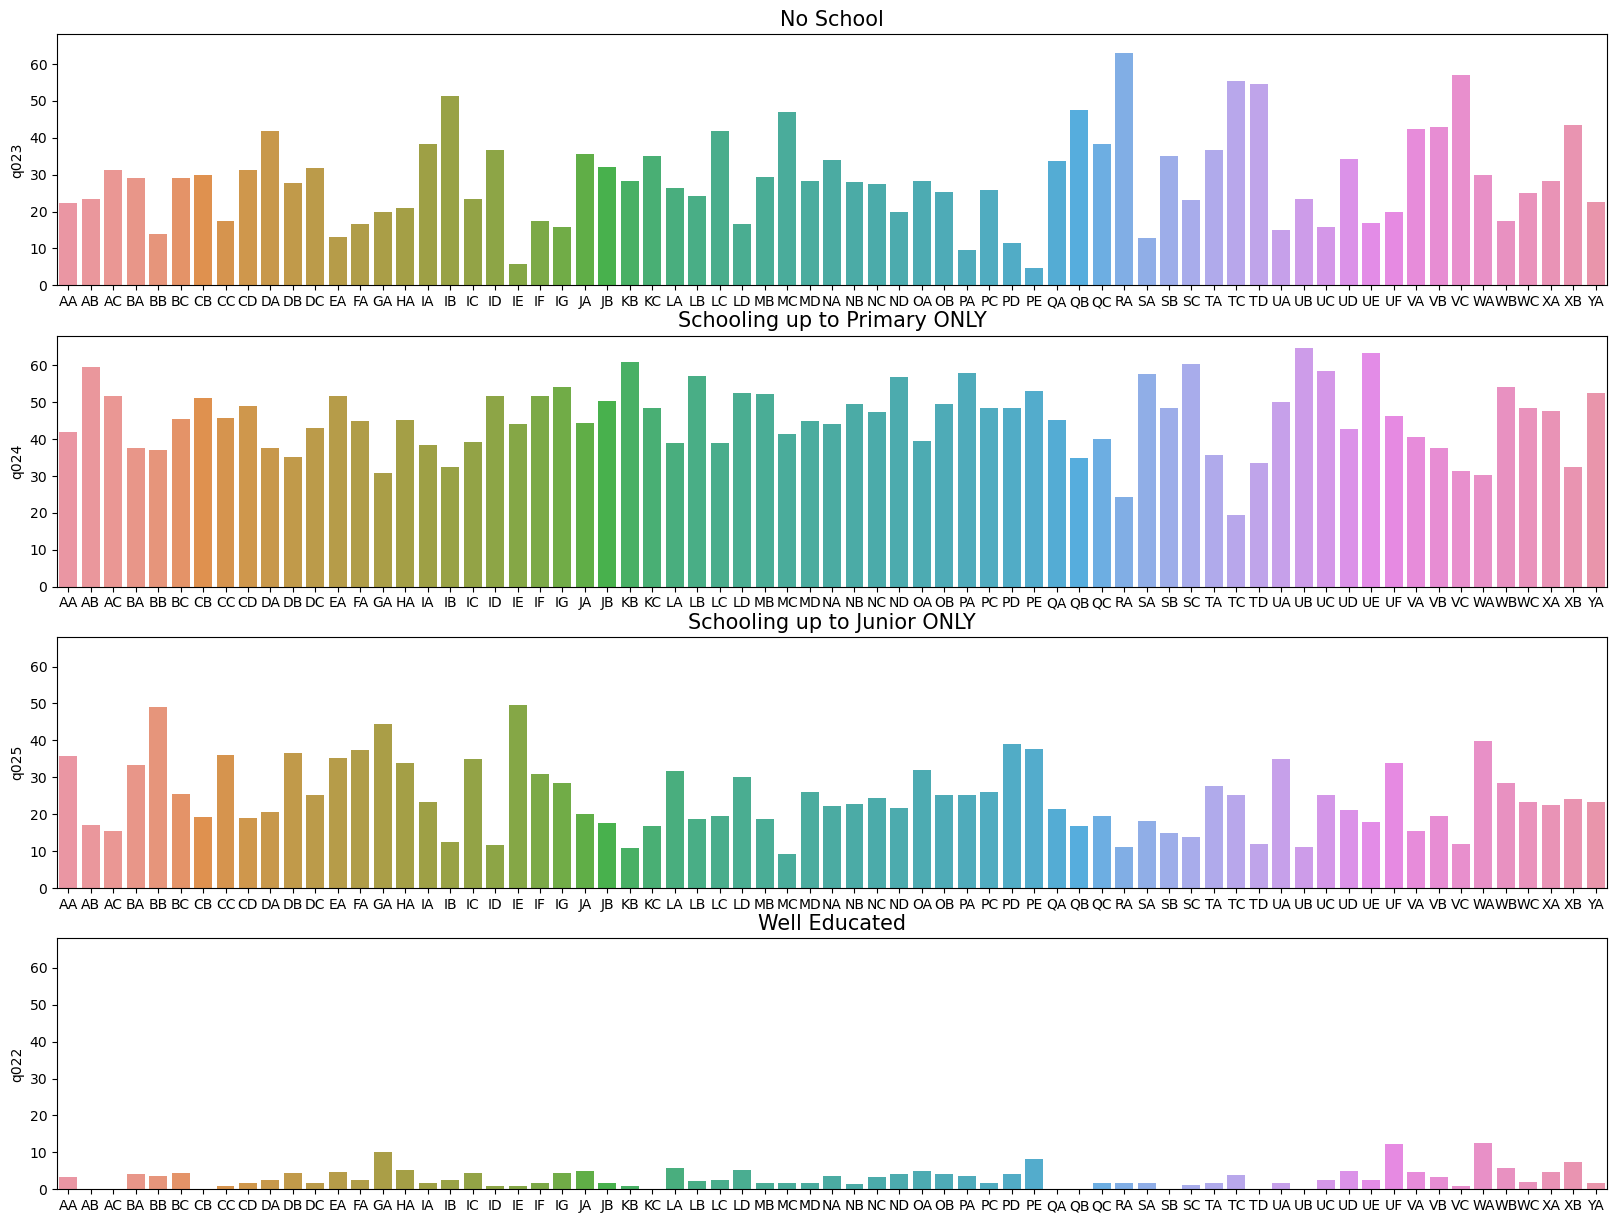

In [15]:
fig, axes = plt.subplots(4, 1, figsize=(20, 15), sharey=True)
sns.barplot(ax = axes[3],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q022'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[3].set_title('Well Educated', fontsize=15)
axes[3].set(xlabel=None)

sns.barplot(ax = axes[0],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q023'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[0].set_title('No School', fontsize=15)
axes[0].set(xlabel=None)

sns.barplot(ax = axes[1],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q024'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[1].set_title('Schooling up to Primary ONLY', fontsize=15)
axes[1].set(xlabel=None)

sns.barplot(ax = axes[2],
            x = ch89q['county'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')],
            y = ch89q['q025'][(ch89q['xiang'] == 3) & (ch89q['sex'] == 'T')])
axes[2].set_title('Schooling up to Junior ONLY', fontsize=15)
axes[2].set(xlabel=None)

plt.show;

How well educated is our population? Here we show % of education. 

In [28]:
ch89q.loc[:,'q227':'q235'].describe()

,q227,q228,q229,q230,q231,q232,q233,q234,q235
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,39.661165,2.504854,35.488835,2.158252,38.471359,1.373301,3.912136,17.055340,7.495146
std,17.467105,1.994792,18.478906,1.415698,18.087778,0.919075,6.312087,15.089995,6.617801
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.075000,1.300000,21.750000,1.100000,24.700000,0.700000,0.000000,4.750000,2.600000
50%,38.900000,2.000000,35.650000,2.100000,39.550000,1.200000,2.100000,13.800000,6.100000
75%,50.850000,3.400000,48.475000,3.000000,50.575000,1.800000,4.650000,24.075000,11.050000
max,95.700000,14.900000,93.500000,9.100000,95.700000,5.800000,60.900000,93.500000,36.500000


Q227 e%DIARRH - questionnaire 1987-9 BIRTHS: PERCENT OF CHILDREN SUFFERING FROM DIARRHOEA DURING LAST 3 MONTHS
Q228 eDIARRH - questionnaire 1987-9 BIRTHS: NUMBER OF DAYS IN LAST 3 MONTHS CHILD SUFFERED FROM DIARRHOEA
Q229 e%RESP - questionnaire 1987-9 BIRTHS: PERCENT OF CHILDREN SUFFERING FROM RESPIRATORY TRACT INFECTION DURING LAST 3 MONTHS
Q230 eRESPINF - questionnaire 1987-9 BIRTHS: NUMBER OF DAYS IN LAST 3 MONTHS CHILD SUFFERED FROM RESPIRATORY TRACT INFECTION                                                    
Q231 e%FEVER - questionnaire 1987-9 BIRTHS: PERCENT OF CHILDREN SUFFERING FROM FEVER DURING LAST 3 MONTHS
Q232 eFEVER - questionnaire 1987-9 BIRTHS: NUMBER OF DAYS IN LAST 3 MONTHS CHILD SUFFERED FROM FEVER
Q233 eLICE - questionnaire 1987-9 BIRTHS: PERCENT OF CHILDREN SUFFERING FROM LICE DURING LAST 3 MONTHS                                                                                            
Q234 eWORMS - questionnaire 1987-9 BIRTHS: PERCENT OF CHILDREN SUFFERING FROM WORMS             
Q235 eSCRATCH - questionnaire 1987-9 BIRTHS: PERCENT OF CHILDREN SCRATCHING, SUGGESTING PARASITOSIS      

The table above is an example of the types of questions we took a look at. The questions in the questionnaire were quite extensive  

For brevity, we will not be including every section. For a deeper dive on the questionnaire, please refer to "eda-ct.ipynb". 

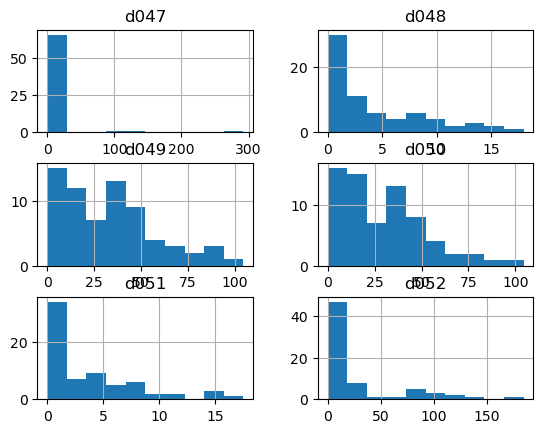

In [26]:
ch89dg[ch89dg['xiang']==3].loc[:,'d047':'d052'].hist();

 animal product intake (g/day/person) D047 to D052:
D047 MILK       diet survey MILK AND DAIRY PRODUCTS INTAKE                            
D048 EGGS       diet survey EGG INTAKE                             
D049 MEAT       diet survey MEAT INTAKE (red meat and poultry)                   
D050 REDMEAT    diet survey RED MEAT (pork, beef, mutton)               
D051 POULTRY    diet survey POULTRY INTAKE (g/day/reference man, as-consumed basis)
D052 FISH       diet survey FISH INTAKE (g/day/reference man, as-consumed basis) 

A look at the dietary choices of our population size. Do these dietary choices adversely affect mortality? For a more in depth exploration, please refer to './code_notebooks/jahnavi.ipynb'

[Text(0.5, 1.0, 'Mortality Rate Ages 35-69 per 1,000 by Sex & Province'),
 Text(0.5, 0, 'Female Mortality'),
 Text(0, 0.5, 'Male Mortality')]

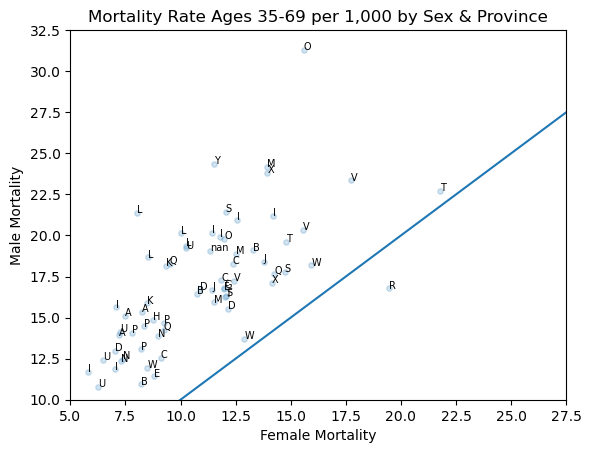

In [21]:
fig,ax = plt.subplots()
f = ch89m[ch89m['sex']=='F']['m005']
m = ch89m[ch89m['sex']=='M']['m005']
# plt.scatter(f,m)
ax.set(xlim=(5, 27.5), ylim=(10, 32.5))
plt.plot([0,35],[0,35])
plt.scatter(x = f, y = m, alpha = .2, s=15)
for i, county in enumerate(ch89m[ch89m['sex']=='F']['county'].str[0]):
    plt.annotate(county, (f[f.index[i]],m[m.index[i]]), fontsize = 7)
ax.set(title = 'Mortality Rate Ages 35-69 per 1,000 by Sex & Province', 
       xlabel = 'Female Mortality', ylabel='Male Mortality')

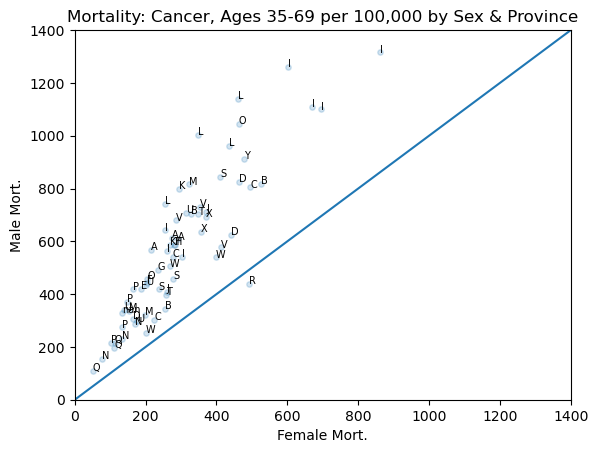

In [27]:
fig,ax = plt.subplots()
f = ch89m[ch89m['sex']=='F']['m023']*100
m = ch89m[ch89m['sex']=='M']['m023']*100
# plt.scatter(f,m)
ax.set(xlim=(0, 1400), ylim=(0, 1400))
plt.plot([0, 1400],[0, 1400])
plt.scatter(x = f, y = m, alpha = .2, s=15)
for i, county in enumerate(ch89m[ch89m['sex']=='F']['county'].str[0]):
    plt.annotate(county, (f[f.index[i]],m[m.index[i]]), fontsize = 7)
ax.set(title = 'Mortality: Cancer, Ages 35-69 per 100,000 by Sex & Province', 
       xlabel = 'Female Mort.', ylabel='Male Mort.');

The big question we wanted to address is how various features/lifestyle choices affect mortality so we took a look at the mortalities we have.

The above charts show a disparity in the mortality rates for overall mortality and cancer rates between men and women in the data. Mortality among males is disproportionately higher than females.

For a more exhaustive EDA on mortality, please refer to './code_notebooks/will.ipynb'

## Modeling

Since our data is all continuous and numerical, we decided to use linear regression to see if we could glean any insight to which mortality rates were affected by which features. Creating a predictive model is secondary to discovering which features effected our mortality targets.

Ridge and Lasso CV were both evaluated but due to our dimensionality we got a better result using Lasso. For our target features, we chose all the mortality columns from the mortality CSV (CH89m) and trained our data on everything else; CH89dg, CH89pru and CH89q.

Our baseline models for several selected mortality targets was near 0 for the most part and didn't give too much insight. The first models we produced did not filter mortality features out of the train set and we observed data leakage wherein the test and train scores were severely over inflated.

##### To see all the modeling we performed, refer to ./code_notebooks/modeling-ct.ipynb

Below is our final models and the one we chose to describe each target. PCA was attempted to create a better model but we ultimately decided to use LassoCV model because we were able to retrieve weights from features.

We discovered a clear distinction in the data between male and female participants and built models separated by gender. 

In [29]:
m_df = pd.read_csv('./cleaned_data_descriptive/89all.csv', index_col=[0])

In [30]:
# Data is filtered by Male(M)/Female(F) and Xiang = 3, where Xiang(village/commune) 3 is the average of 1 and 2
male = m_df[(m_df['sex'] == 'M') & (m_df['xiang'] == 3)]\
.dropna(axis = 'columns', thresh=10)
male['county'].fillna('NA', inplace=True)

female = m_df[(m_df['sex'] == 'F') & (m_df['xiang'] == 3)]\
.dropna(axis = 'columns', thresh=10)
female['county'].fillna('NA', inplace=True)

male_df = male.drop(columns = ['county', 'sex', 'xiang'])
female_df = female.drop(columns = ['county', 'sex', 'xiang'])

In [31]:
mortalities_m = male_df[[col for col in male_df.columns if col.startswith('m')]].columns.to_list() # target only mortality columns

mortalities_f = female_df[[col for col in female_df.columns if col.startswith('m')]].columns.to_list() # target only mortality columns

In [35]:
# splitting male and female in base LR model
# Male only:
lr = LinearRegression()
ss = StandardScaler()
lasso = LassoCV(alphas = np.arange(0.001, 10, 1))
# imp_features df will contain all the corr. coef/weights from each feature
imp_features_m = pd.DataFrame()
imputer = SimpleImputer(strategy='mean')

for i in mortalities_m:
    # suppressing the convergence warnings if any
    import warnings
    warnings.filterwarnings("ignore")

    X = male_df.drop(columns = mortalities_m)
    y = male_df[i]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
    
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    y_train = imputer.fit_transform(y_train.values.reshape(-1,1))
    y_test = imputer.transform(y_test.values.reshape(-1,1))
    
    
    ss.fit(X_train)
    Xs_train = ss.transform(X_train)
    Xs_test = ss.transform(X_test)
    
    lr.fit(Xs_train, y_train)
    lasso.fit(Xs_train, y_train)
    
    mortal = i

    update_lrm(lasso, mortal, Xs_train, Xs_test, y_train, y_test)
    
    # appending df to get feature importance (corr. coef) out
    feature_imp = pd.Series(lasso.coef_, index = X.columns)
    feature_imp = feature_imp.sort_values(ascending=False)
    
    imp_features_m[i] = feature_imp

In [36]:
# female only
lr = LinearRegression()
ss = StandardScaler()
lasso = LassoCV(alphas = np.arange(0.001, 10, 1))
# imp_features df will contain all the corr. coef/weights from each feature
imp_features_f = pd.DataFrame()

for i in mortalities_f:
    # suppressing the convergence warnings if any
    import warnings
    warnings.filterwarnings("ignore")

    X = female_df.drop(columns = mortalities_f)
    y = female_df[i]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33)
    
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    y_train = imputer.fit_transform(y_train.values.reshape(-1,1))
    y_test = imputer.transform(y_test.values.reshape(-1,1))
    
    
    ss.fit(X_train)
    Xs_train = ss.transform(X_train)
    Xs_test = ss.transform(X_test)
    
    lr.fit(Xs_train, y_train)
    lasso.fit(Xs_train, y_train)
    
    mortal = i

    update_lrf(lasso, mortal, Xs_train, Xs_test, y_train, y_test)
    
    # appending df to get feature importance (corr. coef) out
    feature_imp = pd.Series(lasso.coef_, index = X.columns)
    feature_imp = feature_imp.sort_values(ascending=False)
    
    imp_features_f[i] = feature_imp

In [46]:
with open('./data/CHNAME.txt', 'r') as file:
    data = file.read()
    rows = data.split('\n')

descriptions = pd.DataFrame(rows)

# descriptions.head()
# return every other row
text_df = descriptions.iloc[::2,:]
text_df['code'] = text_df[0].str.split(expand=True).iloc[:,0]
text_df.rename(columns={0:'description'}, inplace=True)
text_df['code'] = text_df['code'].str.lower()

In [47]:
imp_features_m.reset_index(inplace=True)
imp_features_f.reset_index(inplace=True)

In [48]:
feature_importance_male = imp_features_m.merge(text_df, left_on='index',\
                                               right_on='code', \
                                               how='left').drop(columns = ['index'])
feature_importance_female = imp_features_f.merge(text_df,\
                                                 left_on='index',right_on='code', \
                                                 how='left').drop(columns = ['index'])

With our models built out for each target in the mortality CSV separated by gender, we can use the feature_lookup function to retrieve the top 5 positively correlated features to explore the data. There are approximately 400 features to lookup. A comprehensive list can be found in ./data/CHNAME.txt.

In [50]:
feature_lookup('m031_LIVERCAc', 'm')

,m031_LIVERCAc,description
25,13.633332,P044 HPYLORI plasma HELICOBACTER PYLORI IgG...
142,13.065453,Q093 dPEPULCER questionnaire PERCENTAGE WITH ...
41,9.960253,P005 APOB plasma APOLIPOPROTEIN B (mg/dL...
185,6.332896,Q170 dLEGUMyr questionnaire DAYS PER YEAR EA...
68,6.023733,U015 NSAR nitrosamine study N-NITROSOSAR...
